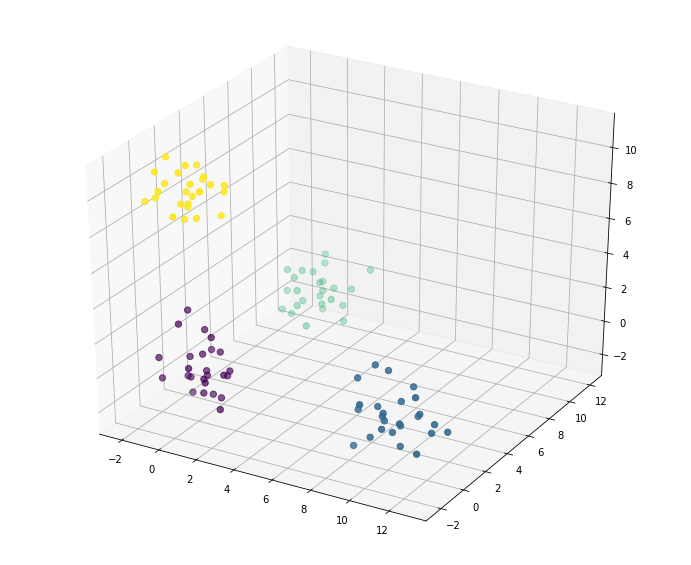

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import sklearn.datasets as ds

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (12.0, 10.0)

fr=0.1
N=500
factor=0.3

centers = [[0,0,0], [10,0,0], [0,10,0], [0,0,10]]
x,y= ds.make_blobs(n_samples=100,  centers=centers, cluster_std=1, shuffle=False, random_state=None)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2],  c=y,s=40)
plt.show()


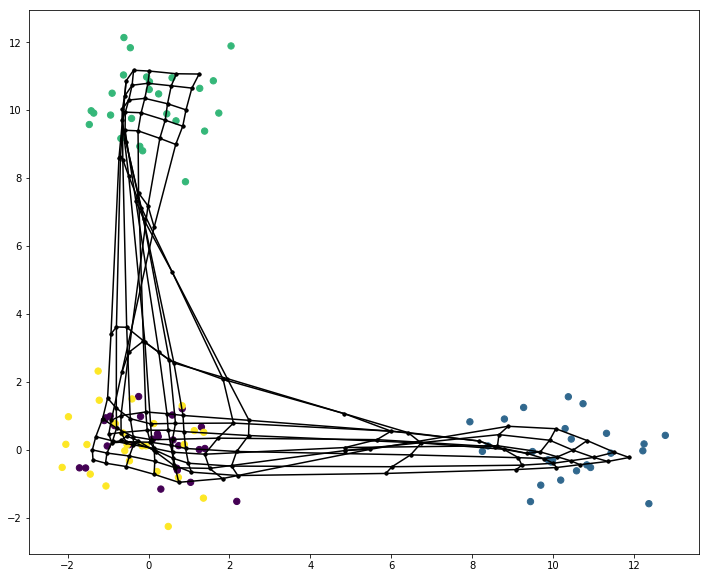

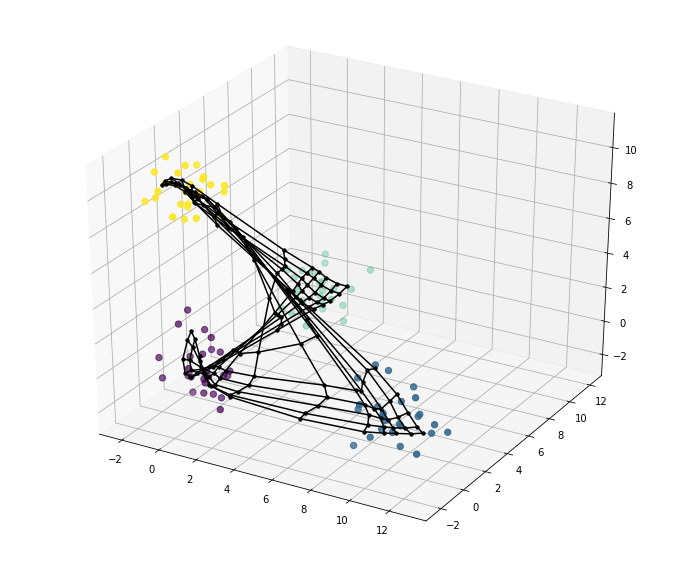

In [10]:
#data = np.matrix.transpose(data)

from minisom import MiniSom
### Initialization and training ###
X=12
Y=12
som2 = MiniSom(X,Y,3,sigma=2,learning_rate=0.2)

som2.random_weights_init(x)

som2.train_random(x,20000)


#print(som2.weights)
#print(som.weights[:,:,0].reshape(-1))
#print(som.weights[:,:,1].reshape(-1))

wx =som2.weights[:,:,0].reshape(-1)
wy = som2.weights[:,:,1].reshape(-1)
wz = som2.weights[:,:,2].reshape(-1)

for i in range(0,X):
    plt.plot(som2.weights[i,:,0],som2.weights[i,:,1],'.-',c='k')
for i in range(0,Y):
    plt.plot(som2.weights[:,i,0],som2.weights[:,i,1],'.-',c='k')
plt.scatter(x[:,0],x[:,1], s=40, c=y)
#plt.scatter(wx,wy,s=40)

plt.show()



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,X):
    ax.plot(som2.weights[i,:,0],som2.weights[i,:,1],som2.weights[i,:,2],'.-',c='k')
for i in range(0,Y):
    ax.plot(som2.weights[:,i,0],som2.weights[:,i,1],som2.weights[:,i,2],'.-',c='k')
    
ax.scatter(x[:,0], x[:,1], x[:,2],  c=y,s=40)
#ax.scatter(wx,wy,wz,c='r',s=20)
plt.show()

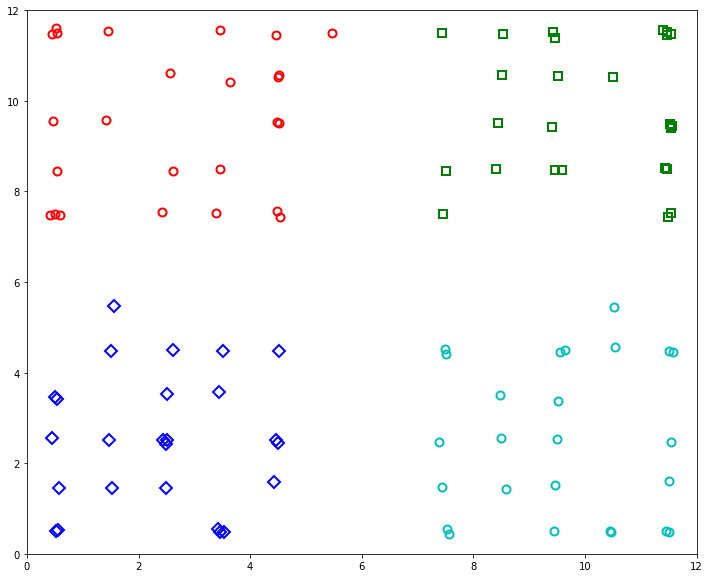

In [11]:
from pylab import plot,axis,show,pcolor,colorbar,bone

markers = ['o','s','D','o']
colors = ['r','g','b','c']

for cnt,xx in enumerate(x):
 w = som2.winner(xx) # getting the winner
 # palce a marker on the winning position for the sample xx
 plot(w[0]+.5+np.random.randn(1)/20,w[1]+.5+np.random.randn(1)/20,markers[y[cnt]],markerfacecolor='None',
   markeredgecolor=colors[y[cnt]],markersize=8,markeredgewidth=2)
axis([0,som2.weights.shape[0],0,som2.weights.shape[1]])
show()